In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 
pd.set_option("display.max_columns",500)
import missingno as msno
from datetime import datetime
import time
import datetime
import statistics
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from pylab import *
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
import datetime
from datetime import timedelta, date
from pandas.tseries.offsets import DateOffset

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.shape

(95109, 57)

In [4]:
data.dtypes

customer_id                          object
customer_unique_id                   object
customer_zip_code_prefix              int64
customer_city                        object
customer_state                       object
order_id                             object
order_status                         object
order_purchase_timestamp             object
order_approved_at                    object
order_delivered_carrier_date         object
order_delivered_customer_date        object
order_estimated_delivery_date        object
order_item_id                       float64
product_id                           object
seller_id                            object
shipping_limit_date                  object
price                               float64
freight_value                       float64
payment_sequential                  float64
payment_type                         object
payment_installments                float64
payment_value                       float64
review_id                       

In [5]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format="%Y-%m-%d %H:%M:%S")

### Clustering avec kmenas

#### elbow method

In [6]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'temps_livraison', 'semaine_order',
       'wekend_order', 'jour_achat', 'heure_achat',
       'nombre-jour-cl

In [7]:
#index des features creés 
listes=data.columns.to_list()
print(listes.index('temps_livraison'))
print(listes.index('nombre_achat_heure_freq'))

38
56


In [8]:
# les nan(s) pour chaque colonne
data.isna().sum()

customer_id                            0
customer_unique_id                     0
customer_zip_code_prefix               0
customer_city                          0
customer_state                         0
order_id                               0
order_status                           0
order_purchase_timestamp               0
order_approved_at                      0
order_delivered_carrier_date           0
order_delivered_customer_date          0
order_estimated_delivery_date          0
order_item_id                          0
product_id                             0
seller_id                              0
shipping_limit_date                    0
price                                  0
freight_value                          0
payment_sequential                     0
payment_type                           0
payment_installments                   0
payment_value                          0
review_id                              0
review_score                           0
review_creation_

In [9]:
data.fillna(0, inplace=True)
X=data.iloc[:,38:56]
score=[]

for cluster in range(1,11):
    kmeans=KMeans(n_clusters=cluster,init="k-means++",random_state=10)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
    

In [10]:
plt.plot(range(1,11),score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
#Wcss est défini comme la somme de la distance au carré entre chaque membre du cluster et son centroïde
plt.ylabel('wcss')
plt.show()

la methode Elbow indique que le nombre optimal K appartient à {2,4,6}

#### Technique t-SNE: réduction de la dimensionnalité non linéaire dans laquelle des données de haute dimension

In [11]:
from sklearn.manifold import TSNE 
tsne_em = TSNE(n_components=2).fit_transform(X)

In [12]:
tsne_em.shape

(95109, 2)

In [13]:
data.duplicated(subset=['customer_unique_id','order_id']).sum()

0

In [14]:
data.duplicated(subset=['order_id']).sum()

0

In [15]:
data.duplicated(subset=['customer_unique_id']).sum()

3047

In [16]:
data.duplicated(subset=['customer_id']).sum()

0

#### Analyse du score de silhouette

For n_clusters = 2 The average silhouette_score is : 0.767315982722064
For n_clusters = 3 The average silhouette_score is : 0.567097804333473
For n_clusters = 4 The average silhouette_score is : 0.40454671152755955
For n_clusters = 5 The average silhouette_score is : 0.4187063638544938
For n_clusters = 6 The average silhouette_score is : 0.4187735678279952
For n_clusters = 7 The average silhouette_score is : 0.3776301157953611
For n_clusters = 8 The average silhouette_score is : 0.34453299374216834
For n_clusters = 9 The average silhouette_score is : 0.3550538332715821
For n_clusters = 10 The average silhouette_score is : 0.35460238041435976


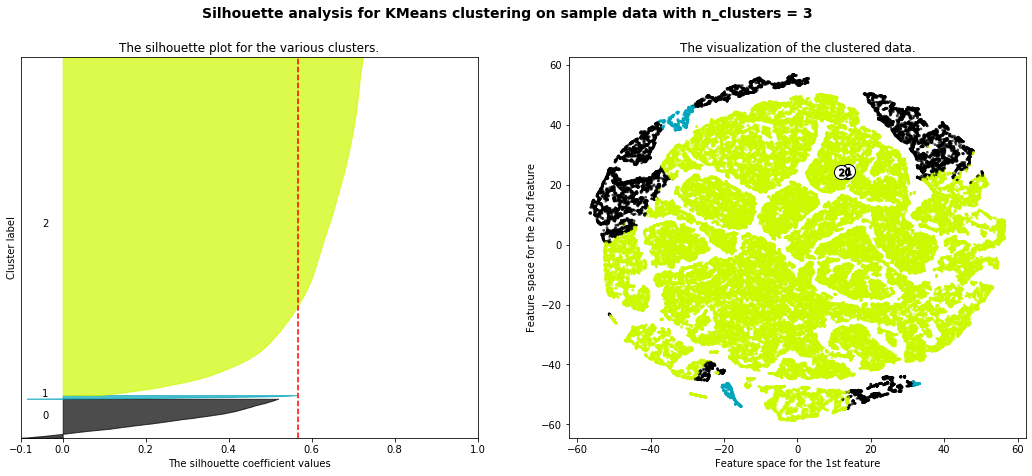

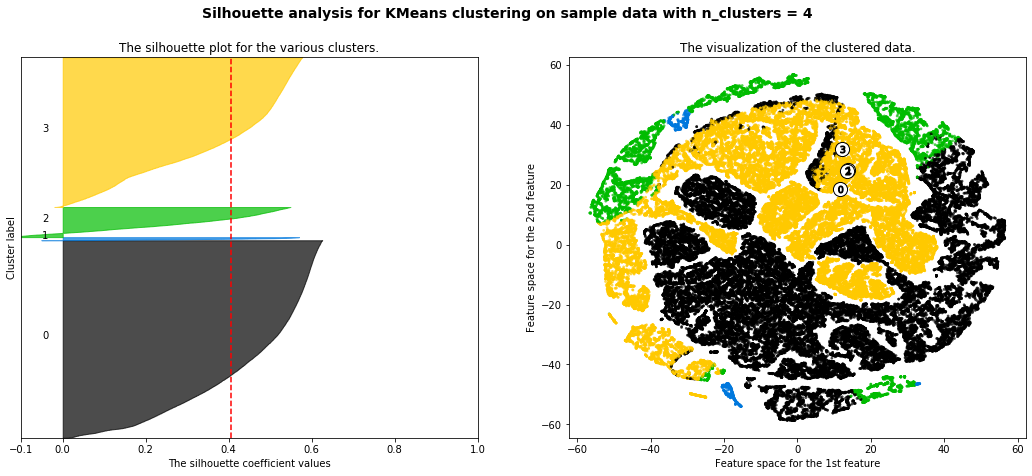

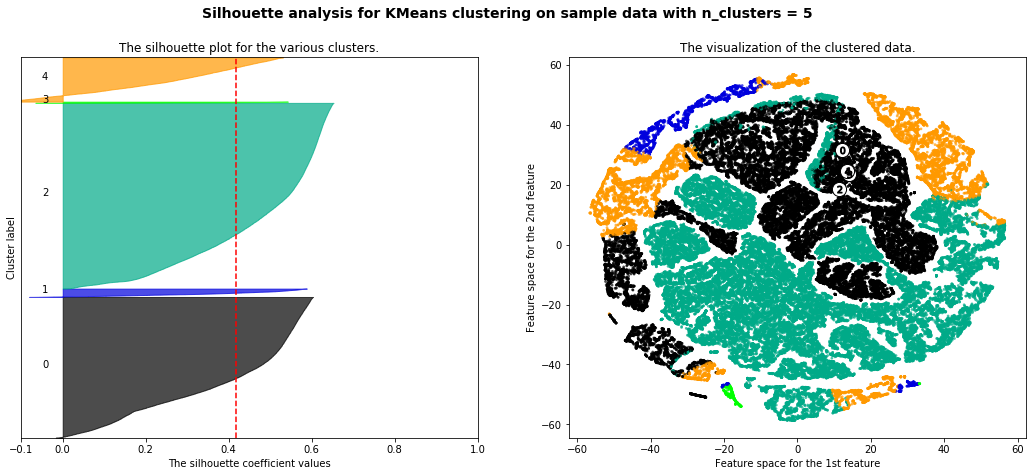

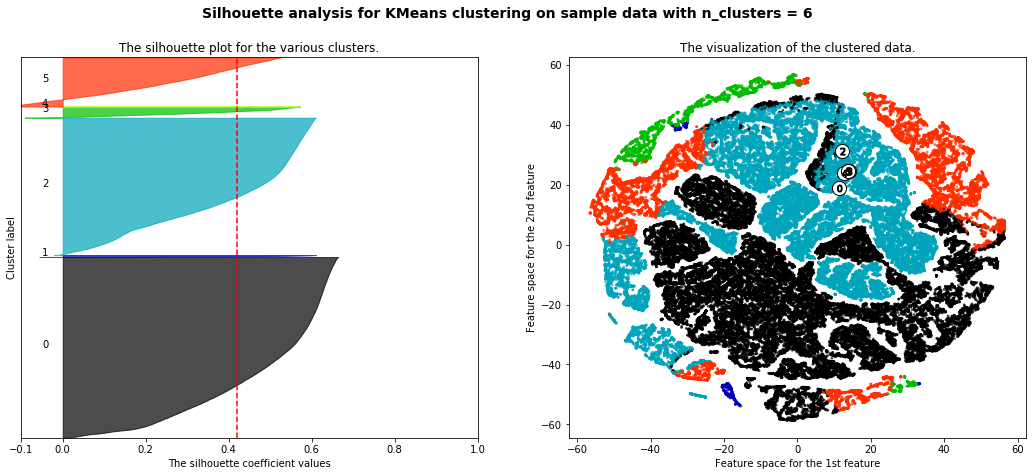

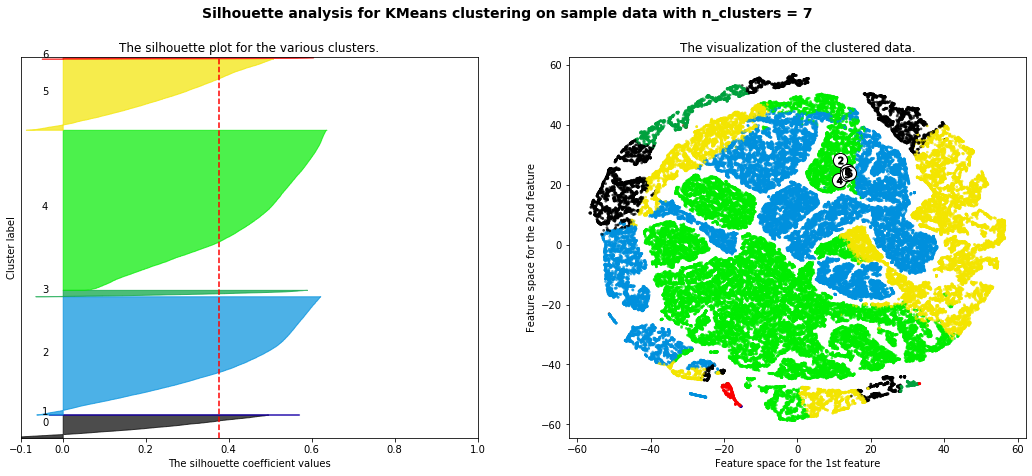

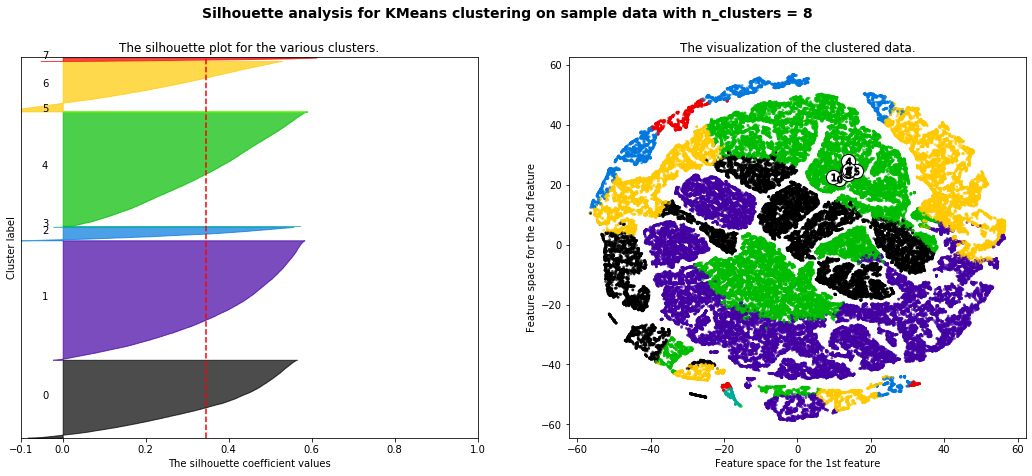

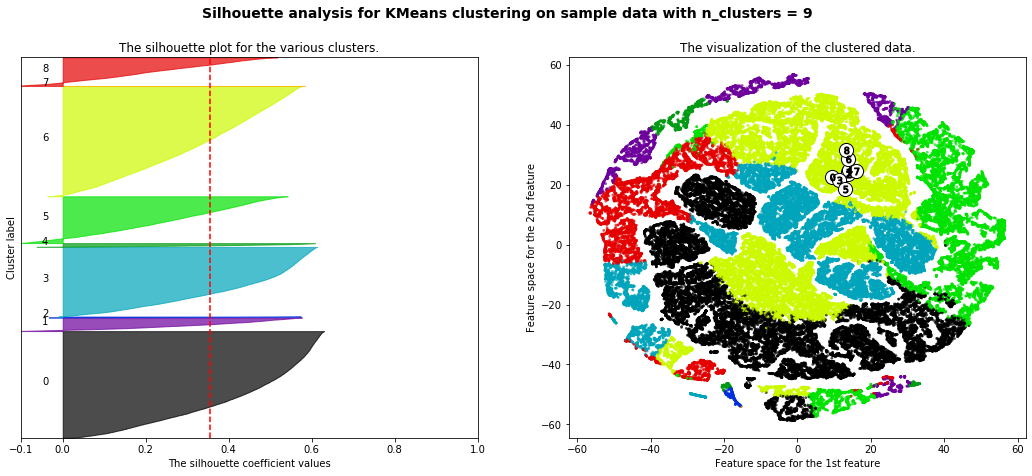

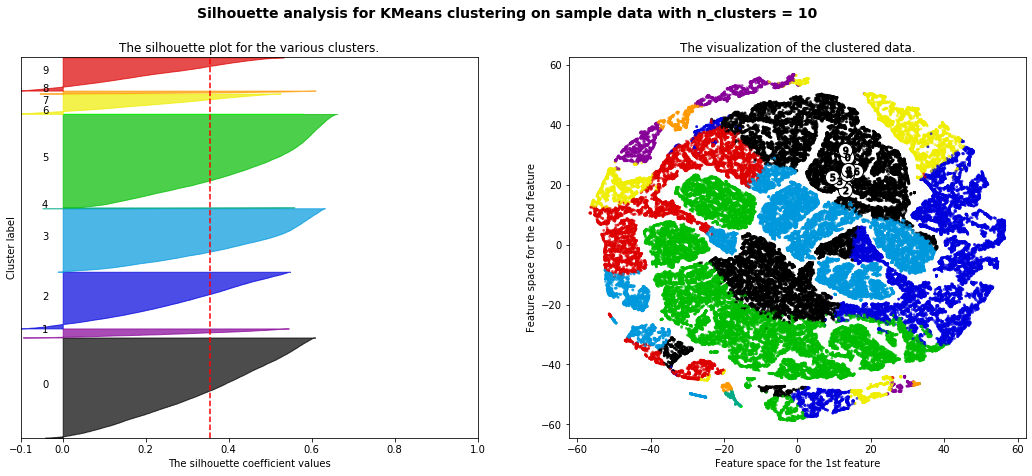

In [17]:

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   
    ax2.scatter(tsne_em [:, 0], tsne_em [:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [18]:
def radarPlot(X, range_n_clusters):
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

    for n_clusters in range_n_clusters:
        model_clustering = KMeans(n_clusters=n_clusters)
        X_clusters = model_clustering.fit_transform(X_scaled)
        y = model_clustering.labels_

        nb_radar = len(np.unique(y))
        variables = X_scaled.columns
        num_vars = len(variables)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1]

        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
        ax.set_title(str(n_clusters) + ' clusters')
        plt.xticks(angles[:-1],variables)

        for i in range(nb_radar):
            boolean_index = y == i
            cluster = X_scaled.loc[boolean_index,variables]
            values = cluster.mean()/X_scaled.max()
            values = values.tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, label= 'clients ' + str(i))
            ax.fill(angles, values, alpha=0.25)


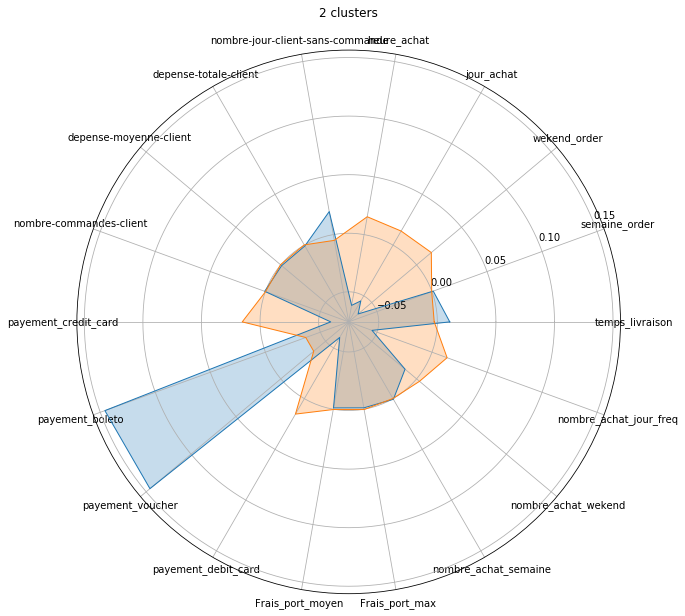

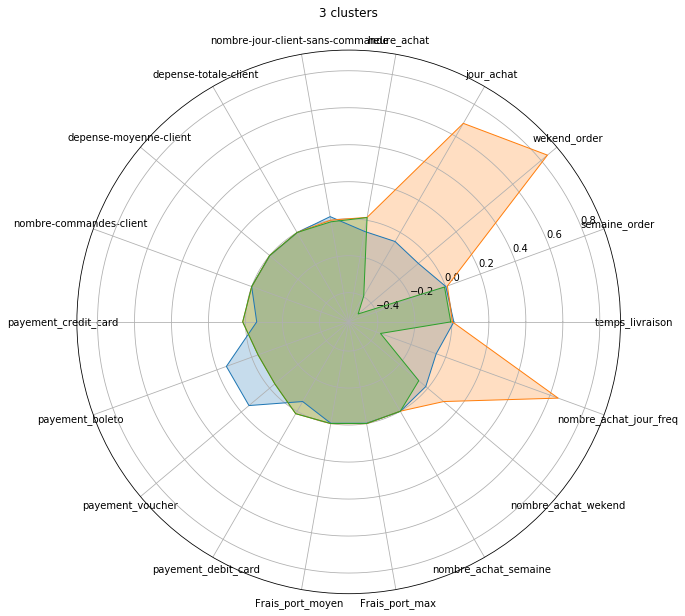

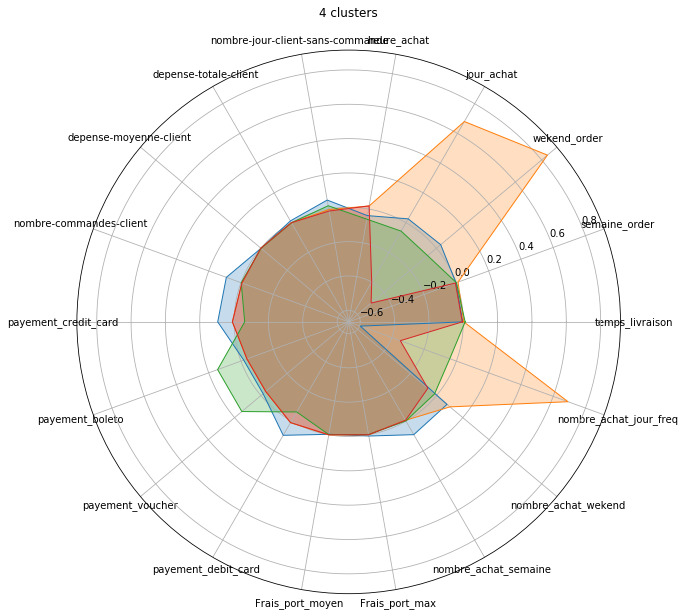

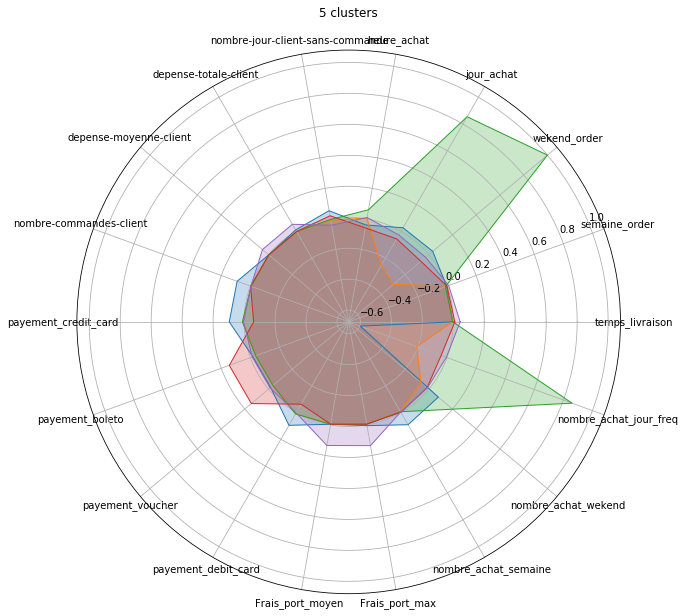

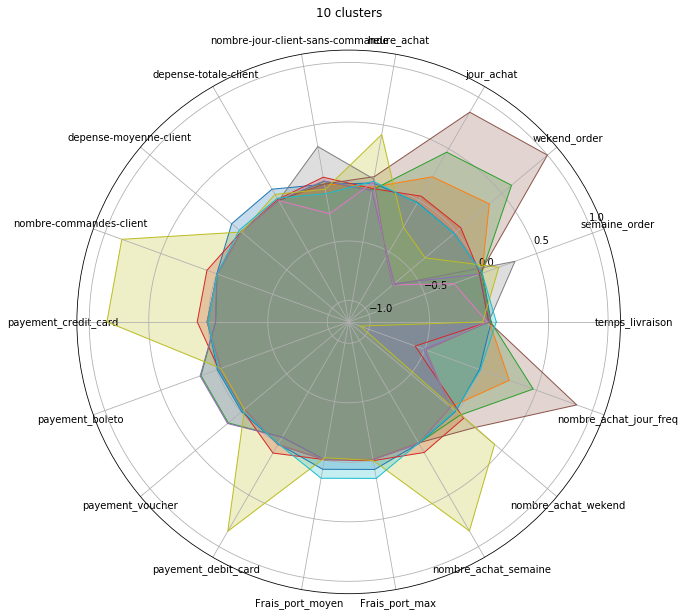

In [19]:
#graphes en radar
from sklearn.preprocessing import StandardScaler
radarPlot(X,range(2,11))

Pour K=6   cluster  en  bleu est favorisé par des clients  qui  font  plus de commande dans le wekkend 

Analyse du score de silhouette  confirme que K=6(meilleur score)

### countplot clusters pour K=6

In [20]:
kmeans=KMeans(n_clusters=6,init="k-means++",random_state=10)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=10)

In [21]:
kmeans.predict(X)

array([2, 5, 2, ..., 5, 2, 2])

In [22]:
X['label-clluster']=kmeans.predict(X)

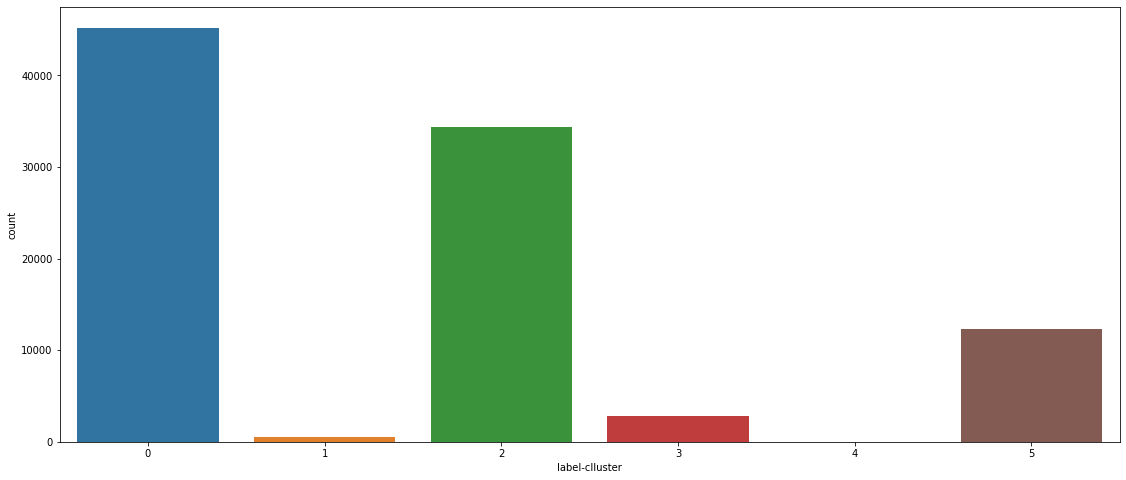

In [23]:
fig,aa=plt.subplots(figsize=(19,8))
aa=sns.countplot(x ='label-clluster',data =X,ax=aa,orient="h")
#aa.set_xticklabels(aa.get_xticklabels(), rotation=90)

In [24]:
data['cluster']=X['label-clluster']

In [25]:
data.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
3  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
4  fd3a0b1bd209f0e7d420c9c3d1127613  567ab47ca4deb92d46dbf54dce07d0a7   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     92480  nova santa rita             RS   
3                     25931             mage             RJ   
4                     88460         angelina             SC   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
3  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   
4  574fe1739f65af76badd0999db300b4f    delivered      2017-03-23 15:10:17   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2017-11-10 00:47:48          2017-11-22 01:43:37   
2  2017-05-08 22:22:56          2017-05-19 20:16:31   
3  2018-02-04 22:29:19          2018-02-19 18:21:47   
4  2017-03-23 15:25:11          2017-03-28 18:23:51   

  order_delivered_customer_date order_estimated_delivery_date  order_item_id  \
0           2017-05-25 10:35:35           2017-06-05 00:00:00            1.0   
1           2017-11-28 00:09:50           2017-12-19 00:00:00            1.0   
2           2017-05-26 09:54:04           2017-06-12 00:00:00            1.0   
3           2018-02-28 21:09:00           2018-03-22 00:00:00            1.0   
4           2017-04-11 10:16:56           2017-04-24 00:00:00            1.0   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
2  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
3  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
4  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-05-22 15:22:12  124.99          21.88                 1.0   
1  2017-11-23 00:47:18  112.99          24.90                 1.0   
2  2017-05-22 22:22:56  124.99          15.62                 1.0   
3  2018-02-18 21:29:19  106.99          30.59                 1.0   
4  2017-04-05 15:25:11  126.99          15.06                 1.0   

  payment_type  payment_installments  payment_value  \
0  credit_card                   2.0         146.87   
1  credit_card                   1.0         275.79   
2  credit_card                   7.0         140.61   
3  credit_card                  10.0         137.58   
4  credit_card                   5.0         142.05   

                          review_id  review_score review_creation_date  \
0  88b8b52d46df026a9d1ad2136a59b30b             4  2017-05-26 00:00:00   
1  7fc63200f12eebb5f387856afdd63db8             1  2017-11-29 00:00:00   
2  251191809e37c1cffc16865947c18a4d             3  2017-05-27 00:00:00   
3  f7123bac5b91a0e2e38d8b41fd1206f4             4  2018-03-01 00:00:00   
4  1496c2a9c41a846ba946a98a09879660             4  2017-04-12 00:00:00   

  review_answer_timestamp  seller_zip_code_prefix      seller_city  \
0     2017-05-30 22:34:40                  8577.0  itaquaquecetuba   
1     2017-12-01 19:41:59                  8577.0  itaquaquecetuba   
2     2017-05-28 02:43:16                  8577.0  itaquaquecetuba   
3     2018-03-02 11:1

### Analyse RFM

In [26]:
rfmTable=data[['customer_id','nombre-jour-client-sans-commande','nombre-commandes-client','depense-moyenne-client']]
rfmTable

customer_id  nombre-jour-client-sans-commande  \
0      06b8999e2fba1a1fbc88172c00ba8bc7                              1492   
1      8912fc0c3bbf1e2fbf35819e21706718                              1316   
2      f0ac8e5a239118859b1734e1087cbb1f                              1501   
3      6bc8d08963a135220ed6c6d098831f84                              1229   
4      fd3a0b1bd209f0e7d420c9c3d1127613                              1546   
...                                 ...                               ...   
95104  dd3926dff45a3459c4bdac0b58a2a0bf                              1156   
95105  406c8e1382162dc6bef214e0c01fc297                              1262   
95106  0fbd856ba1d4961786fb54bd448eb7fe                              1173   
95107  aa0533eb31ed3be79086f11bb2bec430                              1389   
95108  d11524bb77c28efad04e4467eac8a660                              1416   

       nombre-commandes-client  depense-moyenne-client  
0                            1                  146.87  
1                            1                  275.79  
2                            1                  140.61  
3                            1                  137.58  
4                            1                  142.05  
...                        ...                     ...  
95104                        1                  334.12  
95105                        1                  130.03  
95106                        1                  426.70  
95107                        1                  160.46  
95108                        1                   55.18  

[95109 rows x 4 columns]

In [27]:
rfmTable.rename(columns={'nombre-jour-client-sans-commande': 'r', 'nombre-commandes-client': 'f','depense-moyenne-client': 'm'}, inplace=True)
rfmTable

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


customer_id     r  f       m
0      06b8999e2fba1a1fbc88172c00ba8bc7  1492  1  146.87
1      8912fc0c3bbf1e2fbf35819e21706718  1316  1  275.79
2      f0ac8e5a239118859b1734e1087cbb1f  1501  1  140.61
3      6bc8d08963a135220ed6c6d098831f84  1229  1  137.58
4      fd3a0b1bd209f0e7d420c9c3d1127613  1546  1  142.05
...                                 ...   ... ..     ...
95104  dd3926dff45a3459c4bdac0b58a2a0bf  1156  1  334.12
95105  406c8e1382162dc6bef214e0c01fc297  1262  1  130.03
95106  0fbd856ba1d4961786fb54bd448eb7fe  1173  1  426.70
95107  aa0533eb31ed3be79086f11bb2bec430  1389  1  160.46
95108  d11524bb77c28efad04e4467eac8a660  1416  1   55.18

[95109 rows x 4 columns]

In [28]:
rfmTable.describe()

r             f             m
count  95109.000000  95109.000000  95109.000000
mean    1261.389816      1.074525    157.393866
std      152.811778      0.362877    215.098351
min     1022.000000      1.000000      0.010000
25%     1137.000000      1.000000     61.000000
50%     1242.000000      1.000000    103.650000
75%     1371.000000      1.000000    175.080000
max     1718.000000     14.000000  13664.080000

In [29]:
# distribution RFM
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.distplot(rfmTable['r'])
plt.subplot(3, 3, 2)
sns.distplot(rfmTable['f'])
plt.subplot(3, 3, 3)
sns.distplot(rfmTable['m'])

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

In [30]:

# Score  RFM
r_bins = [1021.000000,1137.000000,1371.000000,1718.000000]
f_bins = [0,2,5,14]
m_bins = [0,0.010000,175.080000,13664.080000]
rfmTable['r_score'] = pd.cut(rfmTable['r'], r_bins, labels = [3, 2, 1])
rfmTable['f_score'] = pd.cut(rfmTable['f'], f_bins, labels = [1, 2, 3])
rfmTable['m_score'] = pd.cut(rfmTable['m'], m_bins, labels = [1, 2, 3])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

In [31]:
rfmTable

customer_id     r  f       m r_score f_score  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  1492  1  146.87       1       1   
1      8912fc0c3bbf1e2fbf35819e21706718  1316  1  275.79       2       1   
2      f0ac8e5a239118859b1734e1087cbb1f  1501  1  140.61       1       1   
3      6bc8d08963a135220ed6c6d098831f84  1229  1  137.58       2       1   
4      fd3a0b1bd209f0e7d420c9c3d1127613  1546  1  142.05       1       1   
...                                 ...   ... ..     ...     ...     ...   
95104  dd3926dff45a3459c4bdac0b58a2a0bf  1156  1  334.12       2       1   
95105  406c8e1382162dc6bef214e0c01fc297  1262  1  130.03       2       1   
95106  0fbd856ba1d4961786fb54bd448eb7fe  1173  1  426.70       2       1   
95107  aa0533eb31ed3be79086f11bb2bec430  1389  1  160.46       1       1   
95108  d11524bb77c28efad04e4467eac8a660  1416  1   55.18       1       1   

      m_score  
0           2  
1           3  
2           2  
3           2  
4           2  
...       ...  
95104       3  
95105       2  
95106       3  
95107       2  
95108       2  

[95109 rows x 7 columns]

### Histogram of RFM Customer Segmentation

In [32]:
rfm_merge=pd.merge(data,rfmTable,on='customer_id')
rfm_merge['rfm_group'] =rfm_merge['r_score'].astype(int).astype(str).str.cat(rfm_merge['f_score'].astype(int).astype(str)).str.cat(rfm_merge['m_score'].astype(int).astype(str))
plt.figure(figsize=(60, 15))
sns.countplot(rfm_merge['rfm_group'])
plt.ylabel('nombre client')
plt.xlabel('clusters RFM')

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'clusters RFM')

In [33]:
rfm_merge.shape

(95109, 65)

On a plus de 35000 clients   qui  font une seule commande avec une depense  entre 175.08 et 13664 sachant qu'ils restent  1137.000000  jours sans faire une commande

### Segmentation avec K-Means. Identifier le k optimal 

In [34]:
rfm_merge.iloc[:,61:64]

r_score f_score m_score
0           1       1       2
1           2       1       3
2           1       1       2
3           2       1       2
4           1       1       2
...       ...     ...     ...
95104       2       1       3
95105       2       1       2
95106       2       1       3
95107       1       1       2
95108       1       1       2

[95109 rows x 3 columns]

In [35]:
#rfm_merge.iloc[:,63:66]
X=rfm_merge.iloc[:,61:64]
score=[]
for cluster in range(1,11):
    kmeans=KMeans(n_clusters=cluster,init="k-means++",random_state=10)
    kmeans.fit(X)
    score.append(kmeans.inertia_)

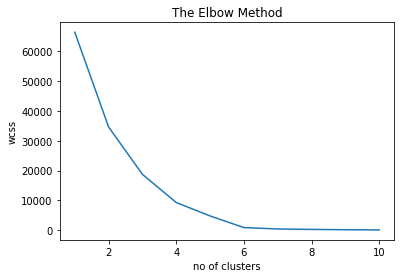

In [36]:
plt.plot(range(1,11),score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
#Wcss est défini comme la somme de la distance au carré entre chaque membre du cluster et son centroïde
plt.ylabel('wcss')
plt.show()

In [46]:
tsne_em = TSNE(n_components=2).fit_transform(X)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


For n_clusters = 2 The average silhouette_score is : 0.6787043817706455


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


For n_clusters = 3 The average silhouette_score is : 0.8618278208911759


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


For n_clusters = 4 The average silhouette_score is : 0.9824411683952886


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


For n_clusters = 5 The average silhouette_score is : 0.9916550202045207


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


For n_clusters = 6 The average silhouette_score is : 0.9945670680776298


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


For n_clusters = 7 The average silhouette_score is : 0.9974878806595491


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


For n_clusters = 8 The average silhouette_score is : 0.9985079436244807


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


For n_clusters = 9 The average silhouette_score is : 0.9991231794594175


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


For n_clusters = 10 The average silhouette_score is : 0.9996699647185481


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


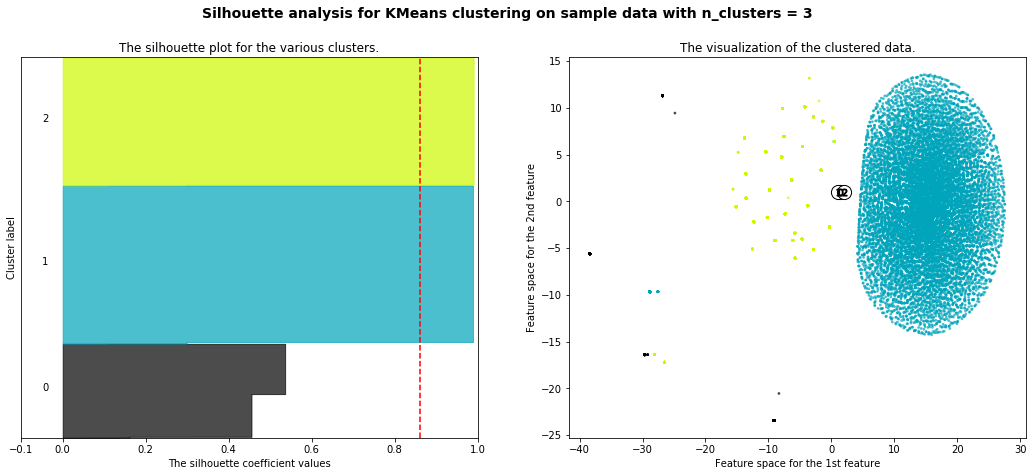

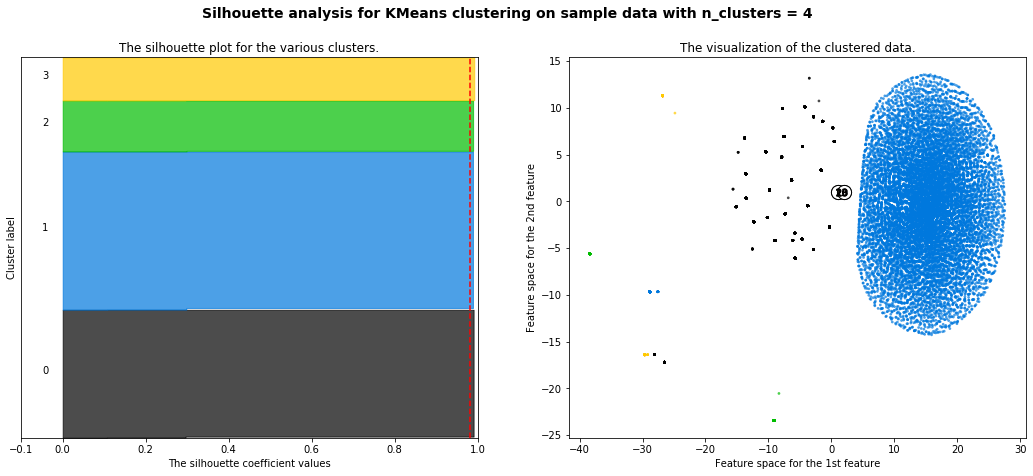

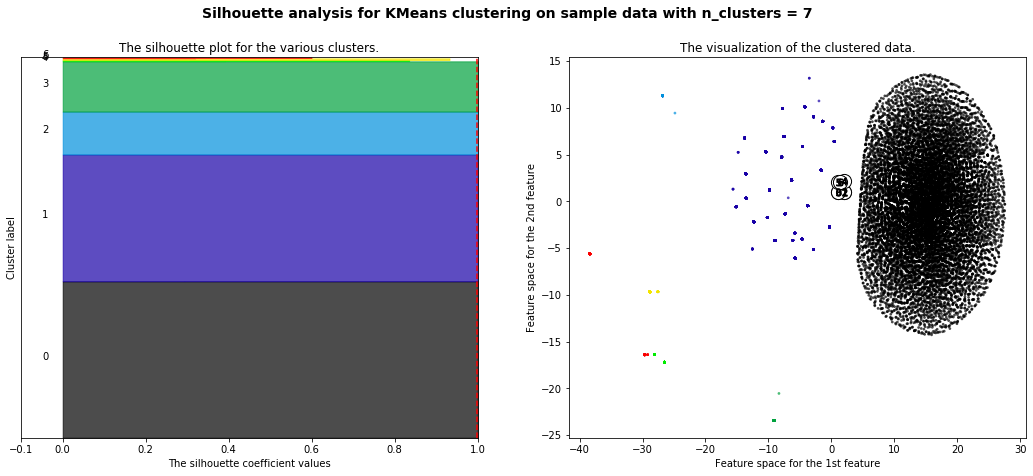

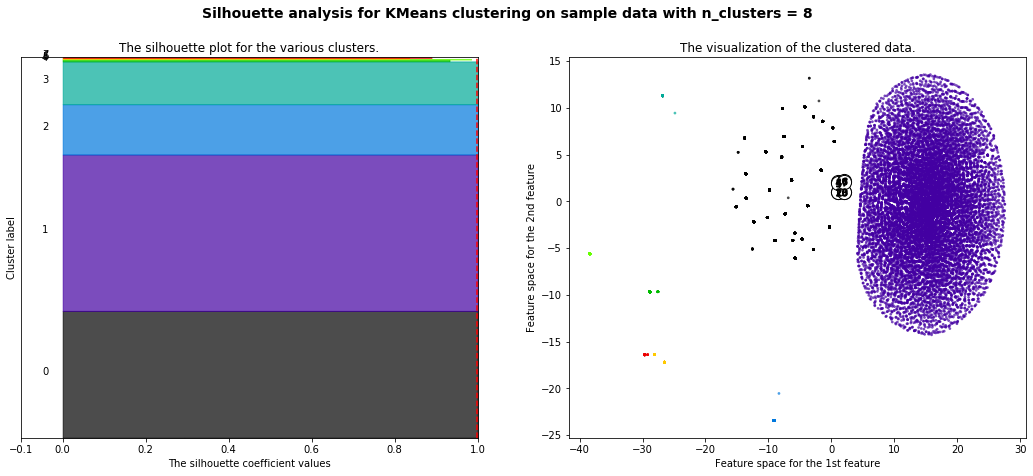

In [47]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   
    ax2.scatter(tsne_em [:, 0], tsne_em [:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

K optimal est 6

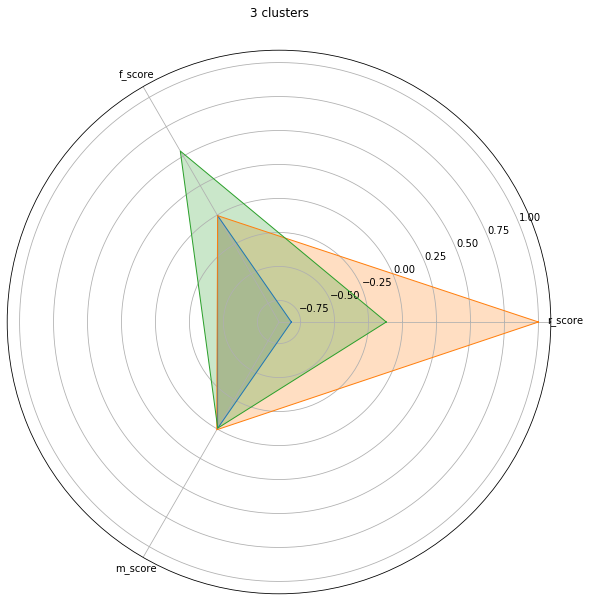

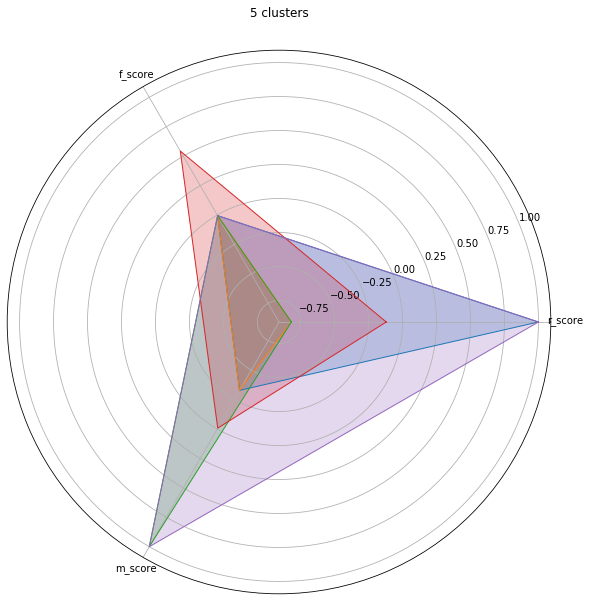

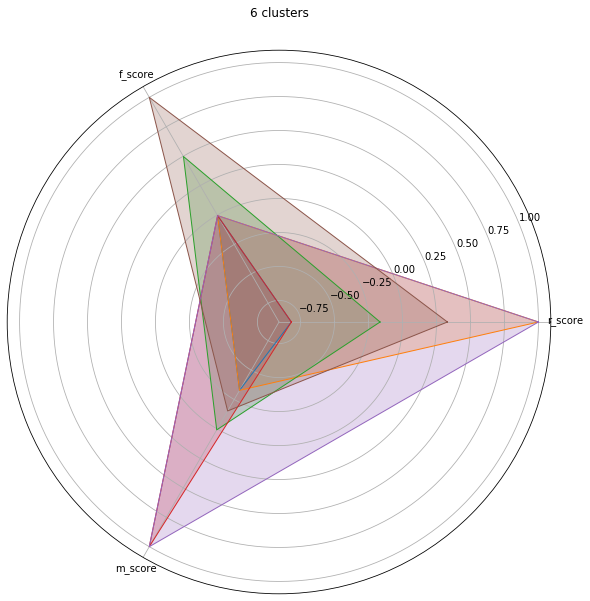

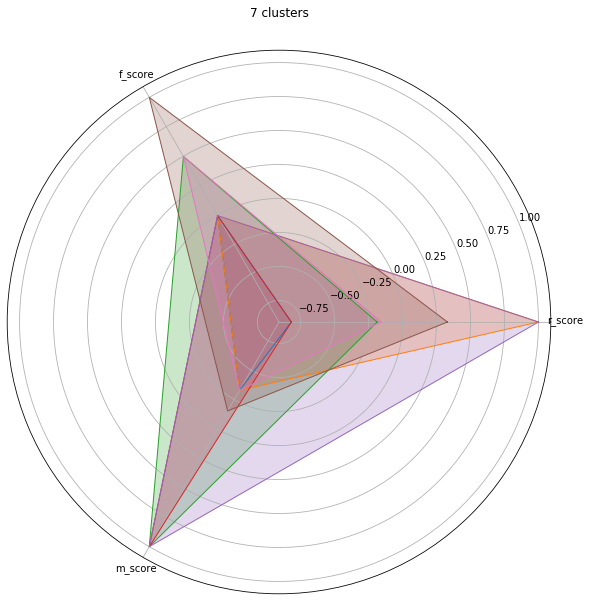

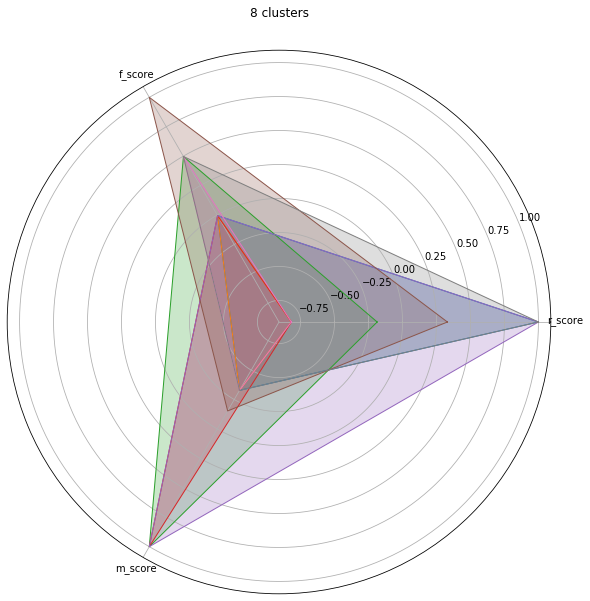

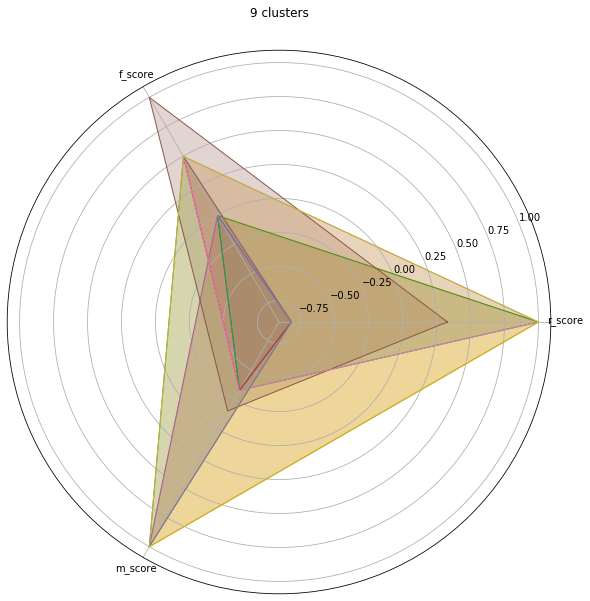

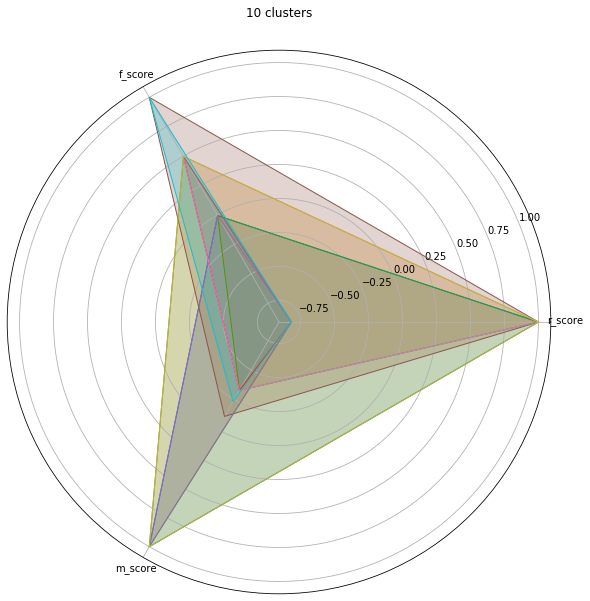

In [48]:
#graphes en radar
radarPlot(X,range(2,11))

Pour K=6 cluster en bleu a des clients  qui depensent plus et ont fait plusieurs commandes 

In [49]:
col=['semaine_order',
       'wekend_order', 'jour_achat', 'heure_achat',
       'nombre-jour-client-sans-commande', 'depense-totale-client',
       'depense-moyenne-client', 'nombre-commandes-client',
       'payement_credit_card', 'payement_boleto', 'payement_voucher',
       'payement_debit_card', 'Frais_port_moyen', 'Frais_port_max',
       'nombre_achat_semaine', 'nombre_achat_wekend', 'nombre_achat_jour_freq',
       'nombre_achat_heure_freq']

X=data[col]

X = pd.DataFrame(X, columns =col)

In [50]:
X.describe()

semaine_order  wekend_order    jour_achat   heure_achat  \
count   95109.000000  95109.000000  95109.000000  95109.000000   
mean       24.374844      3.635187      3.755701     14.774606   
std        14.011573      1.786965      1.967036      5.329189   
min         1.000000      1.000000      1.000000      0.000000   
25%        13.000000      2.000000      2.000000     11.000000   
50%        24.000000      4.000000      4.000000     15.000000   
75%        34.000000      5.000000      5.000000     19.000000   
max        52.000000      6.000000      7.000000     23.000000   

       nombre-jour-client-sans-commande  depense-totale-client  \
count                      95109.000000           95109.000000   
mean                        1261.389816             168.050593   
std                          152.811778             231.004422   
min                         1022.000000               0.010000   
25%                         1137.000000              62.500000   
50%                         1242.000000             108.300000   
75%                         1371.000000             187.060000   
max                         1718.000000           13664.080000   

       depense-moyenne-client  nombre-commandes-client  payement_credit_card  \
count            95109.000000             95109.000000          95109.000000   
mean               157.393866                 1.074525              0.815759   
std                215.098351                 0.362877              0.553434   
min                  0.010000                 1.000000              0.000000   
25%                 61.000000                 1.000000              1.000000   
50%                103.650000                 1.000000              1.000000   
75%                175.080000                 1.000000              1.000000   
max              13664.080000                14.000000             14.000000   

       payement_boleto  payement_voucher  payement_debit_card  \
count     95109.000000      95109.000000         95109.000000   
mean          0.213208          0.213208             0.815759   
std           0.443495          0.443495             0.553434   
min           0.000000          0.000000             0.000000   
25%           0.000000          0.000000             1.000000   
50%           0.000000          0.000000             1.000000   
75%           0.000000          0.000000             1.000000   
max           6.000000          6.000000            14.000000   

       Frais_port_moyen  Frais_port_max  nombre_achat_semaine  \
count      95109.000000    95109.000000          95109.000000   
mean          20.182056       20.427098              1.074525   
std           15.711478       16.041824              0.362877   
min            0.000000        0.000000              1.000000   
25%           13.350000       13.410000              1.000000   
50%           16.430000       16.570000              1.000000   
75%           21.280000       21.540000              1.000000   
max          409.680000      409.680000             14.000000   

       nombre_achat_wekend  nombre_achat_jour_freq  nombre_achat_heure_freq  
count         95109.000000            95109.000000             95109.000000  
mean              0.246875                3.628163                14.224994  
std               0.454186                2.051178                 5.938653  
min               0.000000                0.000000                 0.000000  
25%               0.000000                2.000000                11.000000  
50%               0.000000                4.000000                15.000000  
75%               0.000000                5.000000                19.000000  
max               4.000000                7.000000                23.000000

In [51]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=10)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=10)

In [52]:
kmeans.labels_

array([0, 4, 0, ..., 4, 0, 0])

In [53]:
X['lab']=kmeans.predict(X)

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


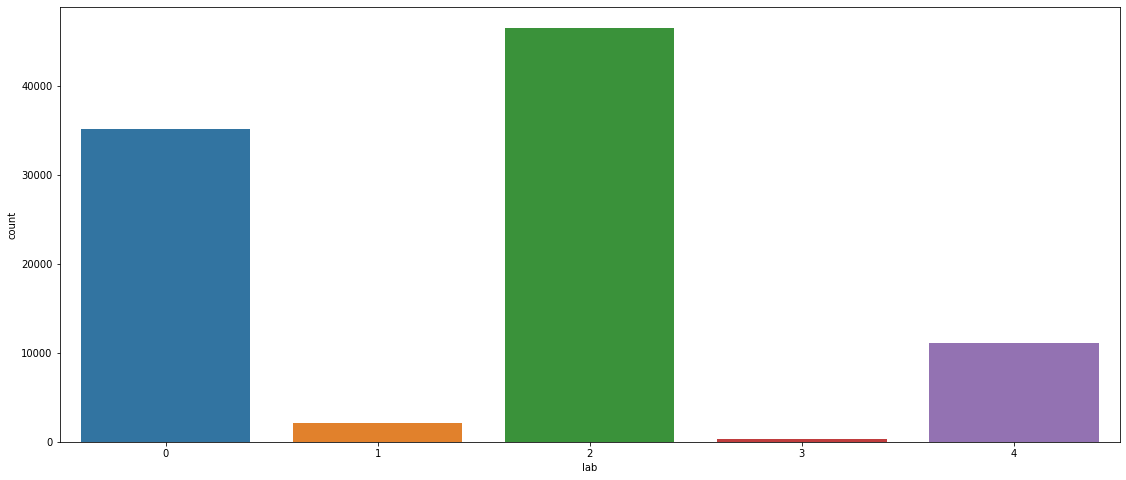

In [54]:
fig,aa=plt.subplots(figsize=(19,8))
aa=sns.countplot(X['lab'])

In [55]:
X=X[X['lab']==3]

In [56]:
X

semaine_order  wekend_order  jour_achat  heure_achat  \
295               44             6           6           17   
684               40             1           1           15   
838               17             2           2           17   
839                5             4           4           18   
1201               7             5           5           13   
...              ...           ...         ...          ...   
94745              5             1           1           13   
94746             40             4           4           19   
94747             41             2           2           14   
94748             15             1           1           11   
94749              8             2           2           18   

       nombre-jour-client-sans-commande  depense-totale-client  \
295                                1320                2039.20   
684                                1353                2234.66   
838                                1149                2783.01   
839                                1231                2783.01   
1201                               1217                1803.24   
...                                 ...                    ...   
94745                              1599                2217.99   
94746                              1350                3126.50   
94747                              1346                3126.50   
94748                              1165                3526.46   
94749                              1576                3602.47   

       depense-moyenne-client  nombre-commandes-client  payement_credit_card  \
295                  2039.200                        1                     1   
684                  2234.660                        1                     1   
838                  1391.505                        2                     2   
839                  1391.505                        2                     2   
1201                 1803.240                        1                     1   
...                       ...                      ...                   ...   
94745                2217.990                        1                     1   
94746                3126.500                        1                     1   
94747                3126.500                        1                     1   
94748                3526.460                        1                     1   
94749                3602.470                        1                     1   

       payement_boleto  payement_voucher  payement_debit_card  \
295                  0                 0                    1   
684                  0                 0                    1   
838                  0                 0                    2   
839                  0                 0                    2   
1201                 0                 0                    1   
...                ...               ...                  ...   
94745                0                 0                    1   
94746                0                 0                    1   
94747                0                 0                    1   
94748                0                 0                    1   
94749                0                 0                    1   

       Frais_port_moyen  Frais_port_max  nombre_achat_semaine  \
295               59.91           59.91                     1   
684               88.57           88.57                     1   
838               80.08           83.66                     2   
839               80.08           83.66                     2   
1201              51.81           51.81                     1   
...                 ...             ...                   ...   
94745             18.00           18.00                     1   
94746            126.51          126.51                     1   
94747            126.51          126.51                     1   
94748            126.47          126.47                     1   


In [57]:
X['nombre-commandes-client'].value_counts()

1    282
2     12
4      4
Name: nombre-commandes-client, dtype: int64

In [58]:
X['payement_credit_card'].value_counts()

1    229
0     57
2      8
4      4
Name: payement_credit_card, dtype: int64

In [59]:
X['payement_debit_card'].value_counts()

1    229
0     57
2      8
4      4
Name: payement_debit_card, dtype: int64

In [60]:
X['payement_boleto'].value_counts()

0    247
1     47
2      4
Name: payement_boleto, dtype: int64

In [61]:
X['payement_voucher'].value_counts()

0    247
1     47
2      4
Name: payement_voucher, dtype: int64

In [62]:
X['jour_achat'].value_counts()

5    49
2    49
1    48
4    46
7    37
3    37
6    32
Name: jour_achat, dtype: int64

In [63]:
X['heure_achat'].value_counts()

14    31
16    24
20    23
15    22
22    22
9     19
21    19
11    19
19    18
18    17
13    16
10    16
17    15
12    15
0      8
23     5
8      3
1      3
7      1
5      1
4      1
Name: heure_achat, dtype: int64

### Stabilité temporaire de Kmeans0

[5 2 5 ... 5 0 5]
[3 2 3 ... 3 0 3]
1.0
[0 4 0 ... 0 5 0]
[3 1 3 ... 3 0 3]
0.9938837068303986
[0 1 0 ... 0 3 0]
[0 2 0 ... 0 3 0]
1.0
[3 5 3 ... 3 0 3]
[2 4 2 ... 2 0 2]
0.9951004423960808
[0 2 0 ... 0 4 0]
[2 5 2 ... 2 0 2]
0.9707087588834019
[3 2 3 ... 3 0 3]
[0 3 0 ... 0 4 0]
0.9999183317170607
[4 0 4 ... 4 1 4]
[3 2 3 ... 3 0 3]
0.9704660859310392
[5 2 5 ... 5 0 5]
[5 1 5 ... 5 0 5]
1.0
[2 0 2 ... 2 5 2]
[2 5 2 ... 2 0 2]
1.0
[0 5 0 ... 0 3 0]
[0 1 0 ... 0 4 0]
1.0
[0 1 0 ... 0 4 0]
[4 3 4 ... 4 0 4]
1.0
[4 2 4 ... 4 0 4]
[2 3 2 ... 2 0 2]
0.9989870393819512


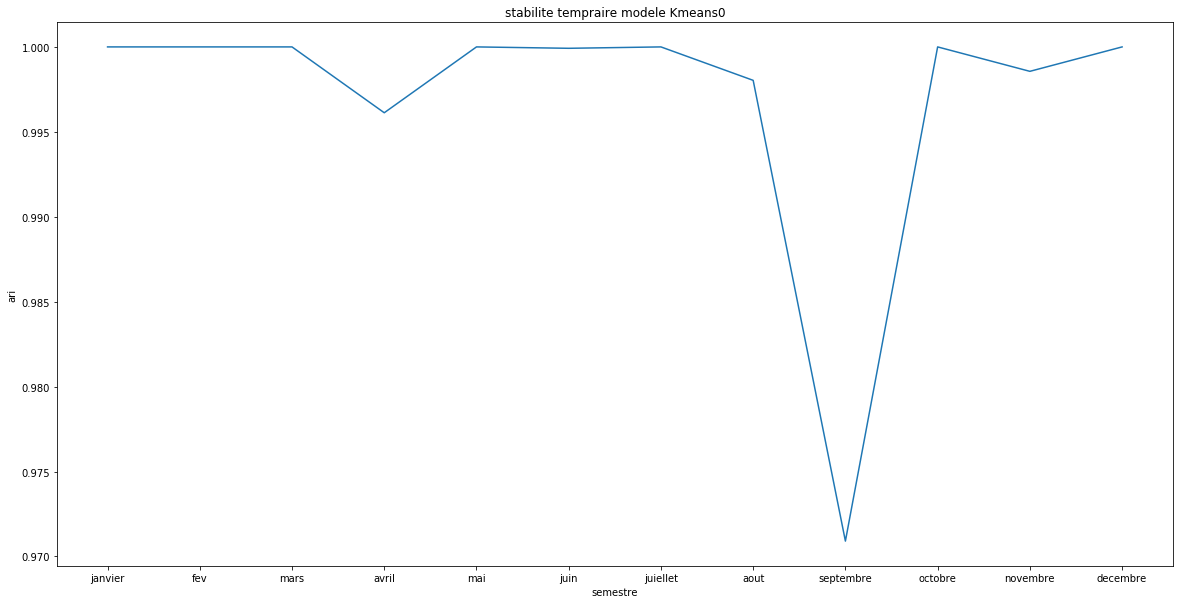

In [64]:
start_date = datetime.datetime(2017,1,1,0,0,0)
end_date = datetime.datetime(2018,1,1,0,0,0)

date1=end_date + pd.DateOffset(days=30) 
date2=end_date + pd.DateOffset(days=60)
date3=end_date + pd.DateOffset(days=90)
date4=end_date + pd.DateOffset(days=120)
date5=end_date + pd.DateOffset(days=150)
date6=end_date + pd.DateOffset(days=180)
date7=end_date + pd.DateOffset(days=210)
date8=end_date + pd.DateOffset(days=240)
date9=end_date + pd.DateOffset(days=270)
date10=end_date + pd.DateOffset(days=300)
date11=end_date + pd.DateOffset(days=330)
date12=end_date + pd.DateOffset(days=360)
liste=[date1,date2,date3,date4,date5,date6,date7,date8,date9,date10,date11,date12]
listes=['janvier','fev','mars','avril','mai','juin','juiellet','aout','septembre','octobre','novembre','decembre']
ARI_score=[]
data.fillna(0, inplace=True)
def preparedef(df,start_date,end_date):
    return df.query('order_purchase_timestamp > @start_date & order_purchase_timestamp < @end_date')


for d in liste:
    data0=preparedef(data,start_date,end_date)
    data1=preparedef(data,start_date,d)
    Y=pd.merge(data1,data0.loc[:,['customer_id']],on='customer_id').iloc[:,38:56]

    X=data0.iloc[:,38:56]
    kmeans0=KMeans(n_clusters=6).fit(X)
    kmeans0.fit_predict(X)
    ARI_score.append(adjusted_rand_score(kmeans0.predict(X),kmeans0.predict(Y)))
  
                     
plt.figure(figsize=(20,10))                     
plt.plot(listes,ARI_score)
plt.title('stabilite tempraire modele Kmeans0')
plt.xlabel('semestre')
plt.ylabel('ari')
plt.show()                     


Il faut  intervenir pour la maintenance du modele  en Septembre

### Stabilité temporaire du modéle assosié  RFM

[0 3 0 ... 0 0 0]
[1 3 1 ... 1 1 1]
1.0
[1 0 1 ... 1 1 1]
[1 3 1 ... 1 1 1]
1.0
[1 3 1 ... 1 1 1]
[0 3 0 ... 0 0 0]
1.0
[1 0 1 ... 1 1 1]
[0 3 0 ... 0 0 0]
1.0
[2 3 2 ... 2 2 2]
[1 0 1 ... 1 1 1]
1.0
[0 3 0 ... 0 0 0]
[1 3 1 ... 1 1 1]
1.0
[1 3 1 ... 1 1 1]
[1 3 1 ... 1 1 1]
1.0
[0 3 0 ... 0 0 0]
[0 3 0 ... 0 0 0]
1.0
[0 3 0 ... 0 0 0]
[1 3 1 ... 1 1 1]
1.0
[0 3 0 ... 0 0 0]
[0 3 0 ... 0 0 0]
1.0
[0 3 0 ... 0 0 0]
[1 3 1 ... 1 1 1]
1.0
[0 3 0 ... 0 0 0]
[0 3 0 ... 0 0 0]
1.0


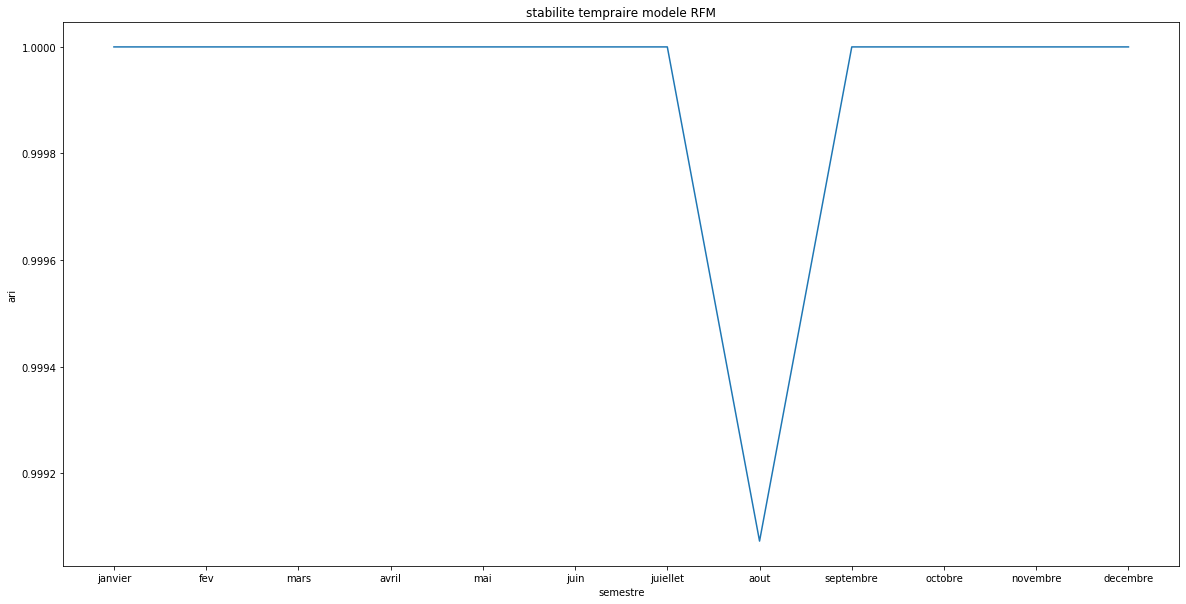

In [68]:
start_date = datetime.datetime(2017,1,1,0,0,0)
end_date = datetime.datetime(2018,1,1,0,0,0)

date1=end_date + pd.DateOffset(days=30) 
date2=end_date + pd.DateOffset(days=60)
date3=end_date + pd.DateOffset(days=90)
date4=end_date + pd.DateOffset(days=120)
date5=end_date + pd.DateOffset(days=150)
date6=end_date + pd.DateOffset(days=180)
date7=end_date + pd.DateOffset(days=210)
date8=end_date + pd.DateOffset(days=240)
date9=end_date + pd.DateOffset(days=270)
date10=end_date + pd.DateOffset(days=300)
date11=end_date + pd.DateOffset(days=330)
date12=end_date + pd.DateOffset(days=360)
liste=[date1,date2,date3,date4,date5,date6,date7,date8,date9,date10,date11,date12]
listes=['janvier','fev','mars','avril','mai','juin','juiellet','aout','septembre','octobre','novembre','decembre']
ARI_score=[]

def preparedef(df,start_date,end_date):
    return df.query('order_purchase_timestamp > @start_date & order_purchase_timestamp < @end_date')


rfm_merge['order_purchase_timestamp'] = pd.to_datetime(rfm_merge['order_purchase_timestamp'], format="%Y-%m-%d %H:%M:%S")

for d in liste:
    data0=preparedef(rfm_merge,start_date,end_date)
    data1=preparedef(rfm_merge,start_date,d)
    Y=pd.merge(data1,data0.loc[:,['customer_id']],on='customer_id').iloc[:,61:64]

    X=data0.iloc[:,61:64]
    kmeans0=KMeans(n_clusters=6).fit(X)
    
    ARI_score.append(adjusted_rand_score(kmeans0.predict(X),kmeans0.predict(Y)))
    
                     
plt.figure(figsize=(20,10))                     
plt.plot(listes,ARI_score)
plt.title('stabilite tempraire modele RFM')
plt.xlabel('semestre')
plt.ylabel('ari')
plt.show()                     


Il faut  intervenir pour la maintenance du modele  pour le mois Aout